In [4]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats
from sklearn.ensemble import IsolationForest


In [5]:
profile = pd.read_csv("/Users/radiahkhan/Documents/OkCupid Dataset Analysis/profiles_revised 2.csv")
profile_df = pd.DataFrame(profile)
profile_df.head()




,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,36,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,37,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,22,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,30,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [65]:
profile_df.keys()

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'ethnicity',
       'height', 'income', 'job', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

In [66]:
#Exploratory Data Analysis 
# Ethnicity 
profile_df[["first_ethnicity", "second_ethnicity", "third_ethnicity"]] = (
    profile_df["ethnicity"].str.split(",",n=2, expand=True)
)

profile_df["ethnicity_count"] = profile_df[["first_ethnicity", "second_ethnicity", "third_ethnicity"]].notna().sum(axis=1) #axis = 1 checks across column that is why. And we dropped the NA values here
profile_df["multi_ethnicity"] = profile_df["ethnicity_count"].apply(lambda x: "Yes" if x > 1 else "No") 
mask_ethnicity = profile_df["ethnicity_count"] != 0
filtered_df_ethnicity = profile_df[mask_ethnicity]
filtered_df_ethnicity


,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,sex,sign,smokes,speaks,status,first_ethnicity,second_ethnicity,third_ethnicity,ethnicity_count,multi_ethnicity
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,...,m,gemini,sometimes,english,single,asian,white,None,2,Yes
1,36,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,...,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,white,None,None,1,No
3,22,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,...,m,pisces,no,"english, german (poorly)",single,white,None,None,1,No
4,30,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,...,m,aquarius,no,english,single,asian,black,other,3,Yes
5,28,average,mostly anything,socially,NaN,graduated from college/university,white,67.0,-1,computer / hardware / software,...,m,taurus,no,"english (fluently), chinese (okay)",single,white,None,None,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59940,32,NaN,NaN,socially,never,working on masters program,middle eastern,62.0,-1,NaN,...,f,sagittarius,no,"english (fluently), french, farsi",single,middle eastern,None,None,1,No
59942,24,fit,mostly anything,often,sometimes,working on college/university,"white, other",72.0,-1,entertainment / media,...,m,leo but it doesn&rsquo;t matter,no,english (fluently),single,white,other,None,2,Yes
59943,41,average,mostly anything,not at all,never,graduated from masters program,asian,71.0,100000,construction / craftsmanship,...,m,sagittarius but it doesn&rsquo;t matter,no,english (fluently),single,asian,None,None,1,No
59944,26,athletic,mostly anything,socially,often,working on college/university,"asian, black",73.0,-1,medicine / health,...,m,leo and it&rsquo;s fun to think about,trying to quit,"english (fluently), spanish (poorly), chinese ...",single,asian,black,None,2,Yes


/var/folders/dv/nxg3knns5hbg0mbh8p2pqwfw0000gn/T/ipykernel_7883/2985264892.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  plot_count_ethnicity_1 = sns.histplot(


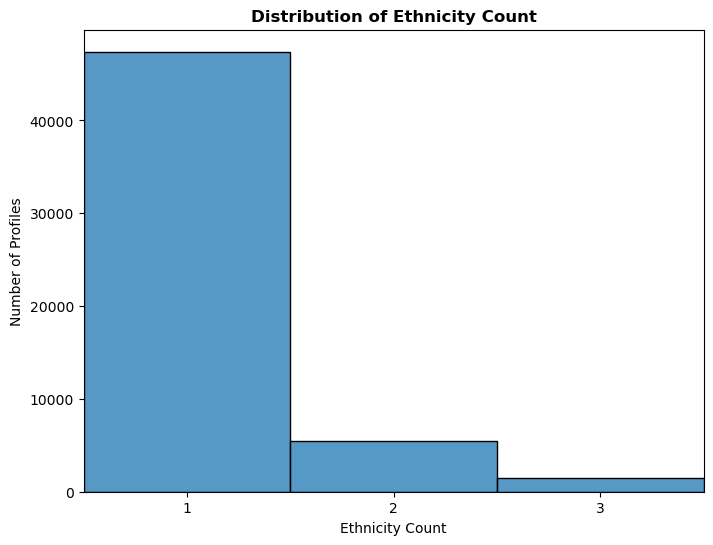

In [67]:
#Plotting ethnicity count 

plt.figure(figsize=(8,6))

plot_count_ethnicity_1 = sns.histplot(
    data=filtered_df_ethnicity,
    x="ethnicity_count",
    stat="count",
     bins=[0.5, 1.5, 2.5, 3.5],
    palette="viridis"  
)
plt.title("Distribution of Ethnicity Count",fontweight = 'bold')
plt.xlabel("Ethnicity Count")
plt.ylabel("Number of Profiles")
plt.xticks([1,2,3]) 
plt.xlim(0.5,3.5) 
plt.show()

In [69]:
#Distribution of ethnicity to test racial bias 
#Given there is low rate of third race we are removing it for now 
mask_ethnicity_2 = profile_df["first_ethnicity"].notna() & profile_df["second_ethnicity"].notna() 
filtered_df_ethnicity_2 = profile_df[mask_ethnicity_2]
filtered_df_ethnicity_2 = filtered_df_ethnicity_2[["sex", "first_ethnicity", "second_ethnicity"]]
filtered_df_ethnicity_2["first_ethnicity"] = filtered_df_ethnicity_2["first_ethnicity"].str.strip()
filtered_df_ethnicity_2["second_ethnicity"] = (filtered_df_ethnicity_2["second_ethnicity"].str.strip())


In [70]:
melted_ethnicity = filtered_df_ethnicity_2.melt(
    id_vars = "sex",
    value_vars = [ "first_ethnicity", "second_ethnicity"],
    var_name = "ethnicity",
    value_name = "count"
)
melted_ethnicity["count"].str.strip()
melted_ethnicity = melted_ethnicity.dropna(subset=["ethnicity"])
melted_ethnicity

,sex,ethnicity,count
0,m,first_ethnicity,asian
1,m,first_ethnicity,asian
2,f,first_ethnicity,white
3,f,first_ethnicity,hispanic / latin
4,m,first_ethnicity,asian
...,...,...,...
13713,f,second_ethnicity,hispanic / latin
13714,m,second_ethnicity,native american
13715,m,second_ethnicity,hispanic / latin
13716,m,second_ethnicity,other


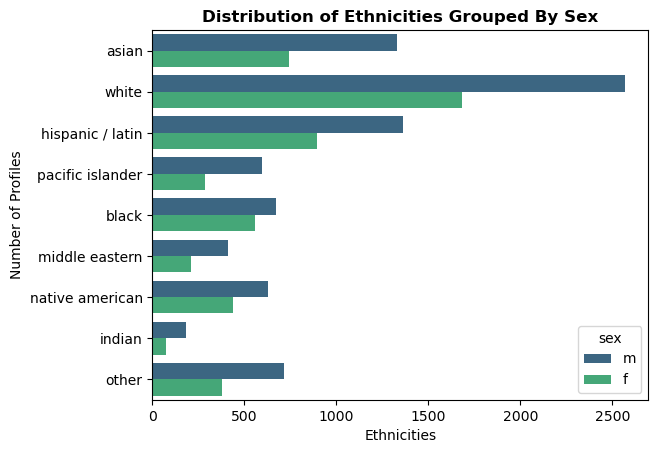

In [71]:
sns.countplot(data=melted_ethnicity, y="count", hue="sex", palette="viridis")
plt.title("Distribution of Ethnicities Grouped By Sex",fontweight = 'bold')
plt.xlabel("Ethnicities")
plt.ylabel("Number of Profiles")

plt.show()



Data Bias 
More data about the white population
Limitation


## Bodytype and sex 
Grouping by sex and counting body type 
Then we can connect it to race 

In [30]:
body_sex_summary = profile_df[["sex", "body_type"]]
body_sex_summary.dropna()

,sex,body_type
0,m,a little extra
1,m,average
2,m,thin
3,m,thin
4,m,athletic
...,...,...
59938,m,average
59942,m,fit
59943,m,average
59944,m,athletic


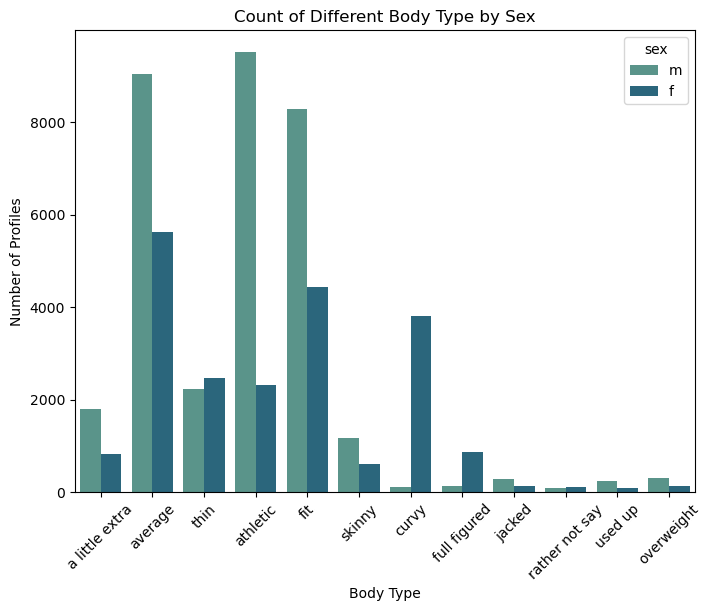

In [31]:
plt.figure(figsize=(8,6))
sns.countplot(
    data=body_sex_summary,
    x="body_type",
    hue="sex",
    palette="crest")
plt.title("Count of Different Body Type by Sex")
plt.xlabel("Body Type")
plt.ylabel("Number of Profiles")
plt.xticks(rotation=45)
plt.show()

In [8]:
orientation_summary = profile_df[["sex", "orientation", 'body_type']]
orientation_summary.dropna()



,sex,orientation,body_type
0,m,straight,a little extra
1,m,straight,average
2,m,straight,thin
3,m,straight,thin
4,m,straight,athletic
...,...,...,...
59938,m,straight,average
59942,m,straight,fit
59943,m,straight,average
59944,m,straight,athletic


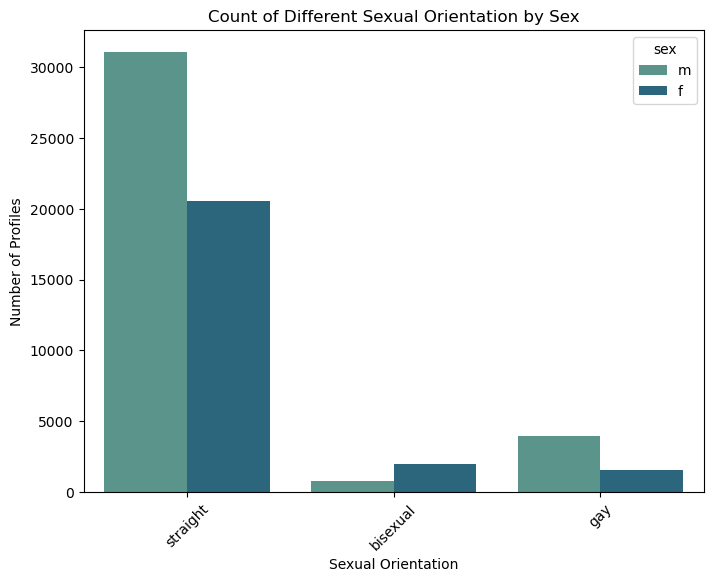

In [32]:
plt.figure(figsize=(8,6))
sns.countplot(
    data=orientation_summary,
    x="orientation",
    hue="sex",
    palette="crest")
plt.title("Count of Different Sexual Orientation by Sex")
plt.xlabel("Sexual Orientation")
plt.ylabel("Number of Profiles")
plt.xticks(rotation=45)
plt.show()

<Figure size 1400x800 with 0 Axes>

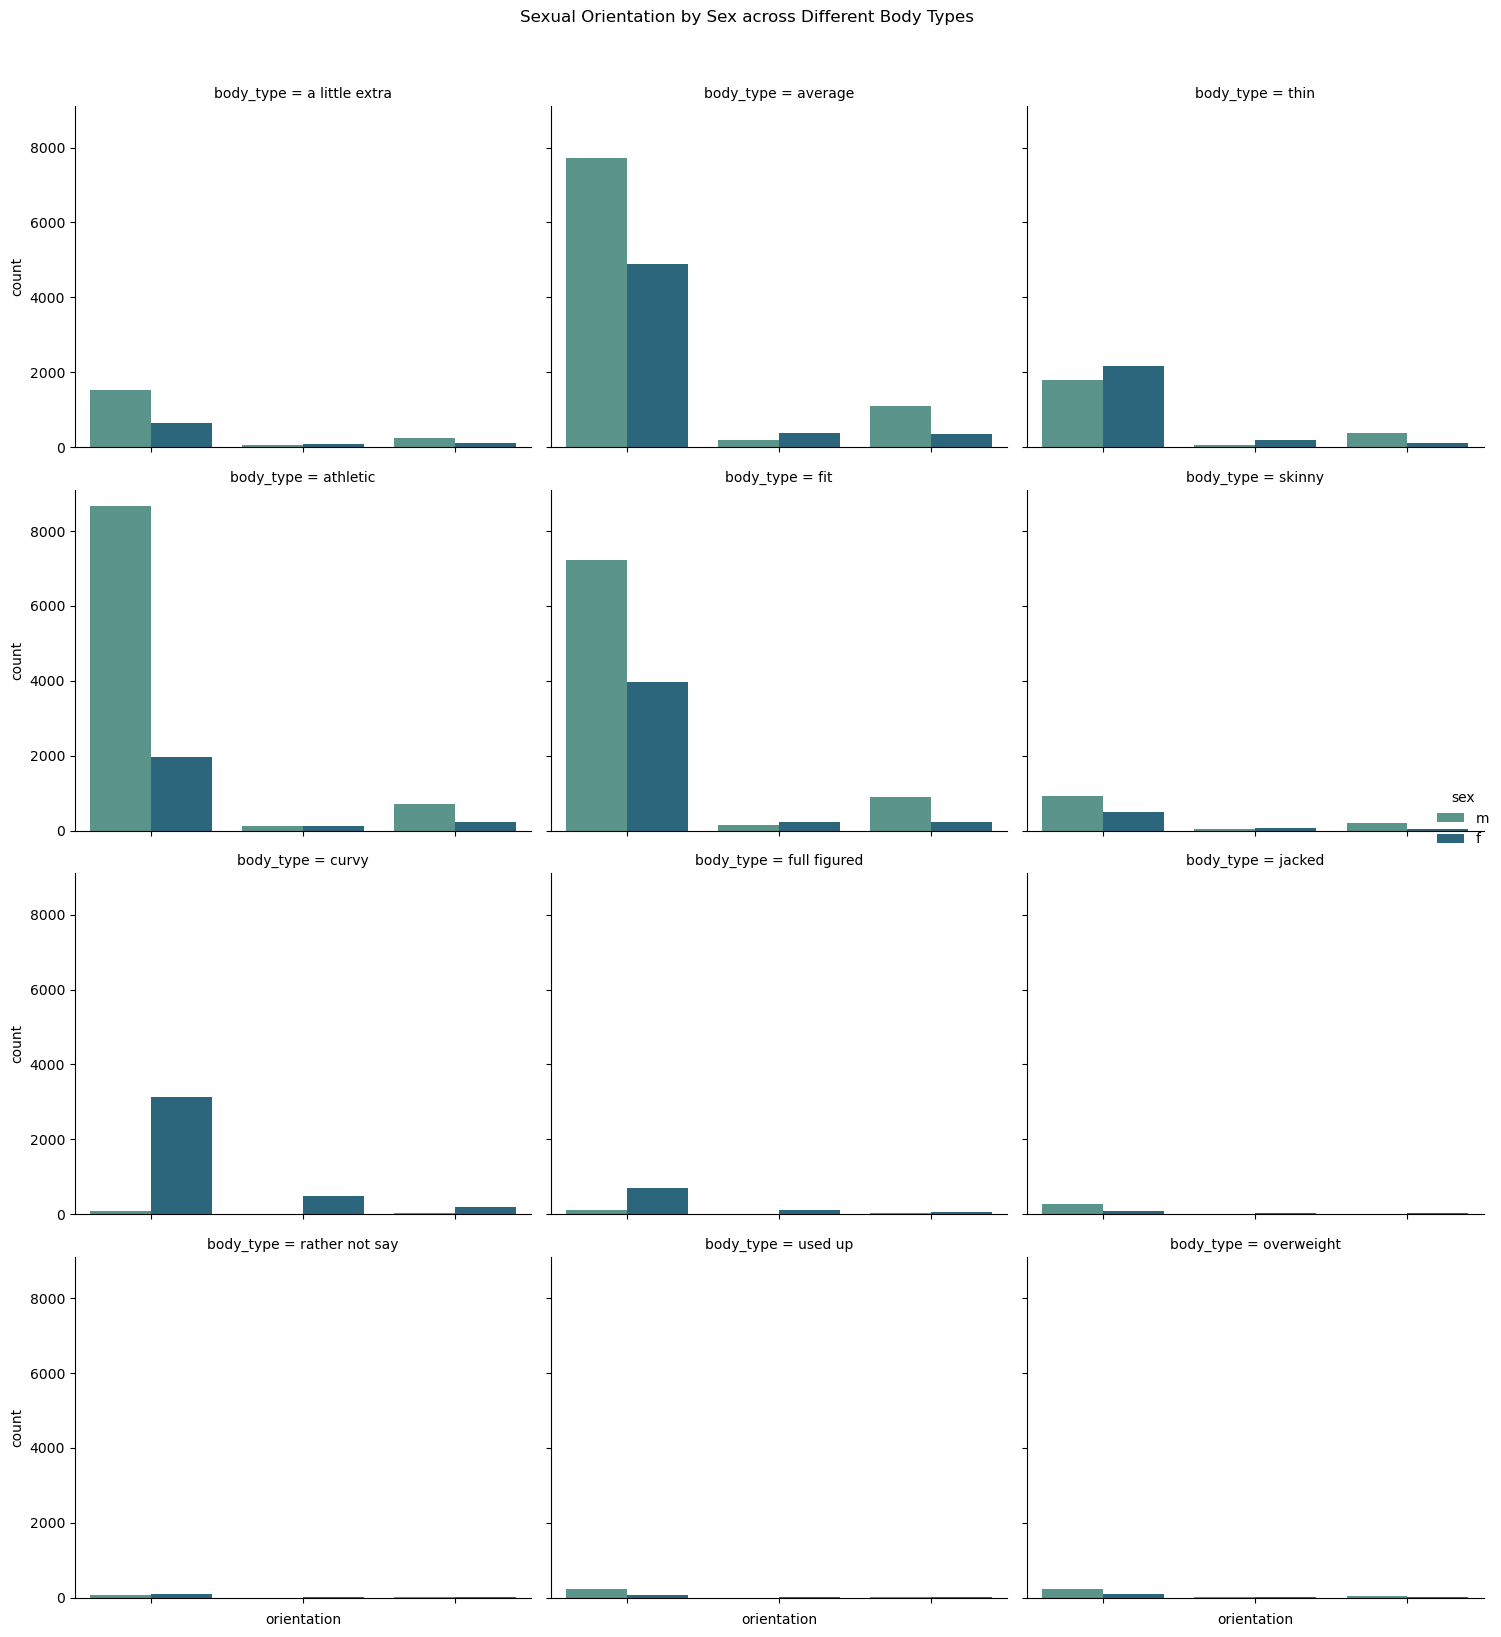

In [33]:
plt.figure(figsize=(14,8))
g = sns.catplot(
    data=profile_df,
    x="orientation",
    hue="sex",
    col="body_type",
    kind="count",
    col_wrap=3, 
    palette="crest",
    height=4,
    aspect=1.2,
    legend=True)
g.set_xticklabels(rotation=45, ha='right')
g.fig.suptitle("Sexual Orientation by Sex across Different Body Types", y=1.02)
plt.tight_layout()
plt.show()

In [38]:
mapping = {
    'working on college/university': "Undergraduate (Bachelor's)",
    'working on space camp': 'Outside',
    'graduated from masters program': 'Postgraduate',
    'working on two-year college': 'Undergraduate (Associate)',
    'nan': 'Not given',
    'graduated from high school': 'High School',
    'working on masters program': 'Postgraduate',
    'graduated from space camp': 'Outside',
    'college/university': 'Undergraduate',
    'dropped out of space camp': 'Outside', 
    'graduated from ph.d program': 'Postgraduate',
    'graduated from law school': 'Postgraduate',
    'working on ph.d program': 'Postgraduate',
    'two-year college': 'Undergraduate (Associate)',
    'graduated from two-year college': 'Undergraduate (Associate)',
    'working on med school': 'Postgraduate',
    'dropped out of college/university': 'College Dropout',
    'space camp': 'Outside',
    'graduated from med school': 'Postgraduate',
    'dropped out of high school': 'High School Dropout',
    'working on high school': 'High School',
    'masters program': 'Postgraduate',
    'dropped out of ph.d program': "Undergraduate (Bachelor's)",
    'dropped out of two-year college': 'College Dropout',
    'dropped out of med school': "Undergraduate (Bachelor's)",
    'high school': 'High School',
    'working on law school': 'Postgraduate',
    'law school': 'Postgraduate',
    'dropped out of masters program': "Undergraduate (Bachelor's)",
    'ph.d program': 'Postgraduate',
    'dropped out of law school': "Undergraduate (Bachelor's)",
    'med school': 'Postgraduate',
    'Undergraduate' : "Undergraduate (Bachelor's)",
     'graduated from college/university' : "Undergraduate (Bachelor's)",
    'Undergraduate' : "Undergraduate (Bachelor's)"
     
}


In [39]:
profile_df["education_group"] = ( profile_df["education"].str.strip().replace(mapping))
profile_df

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,education_group
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single,Undergraduate (Bachelor's)
1,36,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,Outside
2,37,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available,Postgraduate
3,22,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single,Undergraduate (Bachelor's)
4,30,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single,Undergraduate (Bachelor's)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,60,NaN,NaN,socially,never,graduated from college/university,NaN,62.0,-1,sales / marketing / biz dev,has kids,straight,has dogs,catholicism but not too serious about it,f,cancer and it&rsquo;s fun to think about,no,english,single,Undergraduate (Bachelor's)
59942,24,fit,mostly anything,often,sometimes,working on college/university,"white, other",72.0,-1,entertainment / media,doesn&rsquo;t have kids,straight,likes dogs and likes cats,agnosticism,m,leo but it doesn&rsquo;t matter,no,english (fluently),single,Undergraduate (Bachelor's)
59943,41,average,mostly anything,not at all,never,graduated from masters program,asian,71.0,100000,construction / craftsmanship,doesn&rsquo;t have kids,straight,NaN,christianity but not too serious about it,m,sagittarius but it doesn&rsquo;t matter,no,english (fluently),single,Postgraduate
59944,26,athletic,mostly anything,socially,often,working on college/university,"asian, black",73.0,-1,medicine / health,"doesn&rsquo;t have kids, but wants them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,leo and it&rsquo;s fun to think about,trying to quit,"english (fluently), spanish (poorly), chinese ...",single,Undergraduate (Bachelor's)


In [40]:
filtered_education = profile_df[profile_df["education_group"] != "Outside"]
filtered_education.dropna 
filtered_education

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,education_group
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single,Undergraduate (Bachelor's)
2,37,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available,Postgraduate
3,22,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single,Undergraduate (Bachelor's)
4,30,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single,Undergraduate (Bachelor's)
5,28,average,mostly anything,socially,NaN,graduated from college/university,white,67.0,-1,computer / hardware / software,"doesn&rsquo;t have kids, but might want them",straight,likes cats,atheism,m,taurus,no,"english (fluently), chinese (okay)",single,Undergraduate (Bachelor's)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,60,NaN,NaN,socially,never,graduated from college/university,NaN,62.0,-1,sales / marketing / biz dev,has kids,straight,has dogs,catholicism but not too serious about it,f,cancer and it&rsquo;s fun to think about,no,english,single,Undergraduate (Bachelor's)
59942,24,fit,mostly anything,often,sometimes,working on college/university,"white, other",72.0,-1,entertainment / media,doesn&rsquo;t have kids,straight,likes dogs and likes cats,agnosticism,m,leo but it doesn&rsquo;t matter,no,english (fluently),single,Undergraduate (Bachelor's)
59943,41,average,mostly anything,not at all,never,graduated from masters program,asian,71.0,100000,construction / craftsmanship,doesn&rsquo;t have kids,straight,NaN,christianity but not too serious about it,m,sagittarius but it doesn&rsquo;t matter,no,english (fluently),single,Postgraduate
59944,26,athletic,mostly anything,socially,often,working on college/university,"asian, black",73.0,-1,medicine / health,"doesn&rsquo;t have kids, but wants them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,leo and it&rsquo;s fun to think about,trying to quit,"english (fluently), spanish (poorly), chinese ...",single,Undergraduate (Bachelor's)


In [41]:
mapping_2 = { 'Undergraduate': "Undergraduate (Bachelor's)"}
filtered_education["education_group"] = ( filtered_education["education_group"].str.strip().replace(mapping))



/var/folders/dv/nxg3knns5hbg0mbh8p2pqwfw0000gn/T/ipykernel_17598/4060299921.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_education["education_group"] = ( filtered_education["education_group"].str.strip().replace(mapping))


In [42]:
filtered_education["education_group"].unique()

array(["Undergraduate (Bachelor's)", 'Postgraduate',
       'Undergraduate (Associate)', nan, 'High School', 'College Dropout',
       'High School Dropout'], dtype=object)

In [44]:

#Distribution of education level among male and female 
filtered_education_summary = filtered_education[["education_group", "sex"]]

In [45]:
cross_tab_ed_sex = pd.crosstab(filtered_education_summary['education_group'],
                               filtered_education_summary['sex'],
                               margins = False)
print(cross_tab_ed_sex)

sex                             f      m
education_group                         
College Dropout               272    914
High School                   456   1155
High School Dropout            21     81
Postgraduate                 6900   8240
Undergraduate (Associate)     972   1855
Undergraduate (Bachelor's)  12622  18147


In [82]:
chi2, p, dof, expected = stats.chi2_contingency(cross_tab_ed_sex)
print (f"The Chi Square is {chi2} and the p value is {p}")



The Chi Square is 466.1600806007987 and the p value is 1.6033856756972347e-98


It is significant so we will use Bonferonni correction method to identify which groups have variability. 

In [66]:
results = []
for group in cross_tab_ed_sex.index:
        observed_value = cross_tab_ed_sex.loc[group]
        total_value = cross_tab_ed_sex.sum().sum()
        expected = (cross_tab_ed_sex.sum() * observed_value.sum()) / total_value
        chi2, p = stats.chisquare(f_obs=observed_value, f_exp=expected)
        results.append({
        "Education_Group": group,
        "Chi2": chi2,
        "p_value": p
    })
results_data = pd.DataFrame(results)
results_data


#Now setting the threshold
corrected_p = 0.008333333333333333
for value, row in results_data.iterrows(): #for looping through each row 
        if value < 0.008333333333333333: 
                print(f"{row["Education_Group"]} group has significant difference")
        else : 
          print( " ")
          
        



College Dropout group has significant difference
 
 
 
 
 


In [51]:
0.05/6


0.008333333333333333

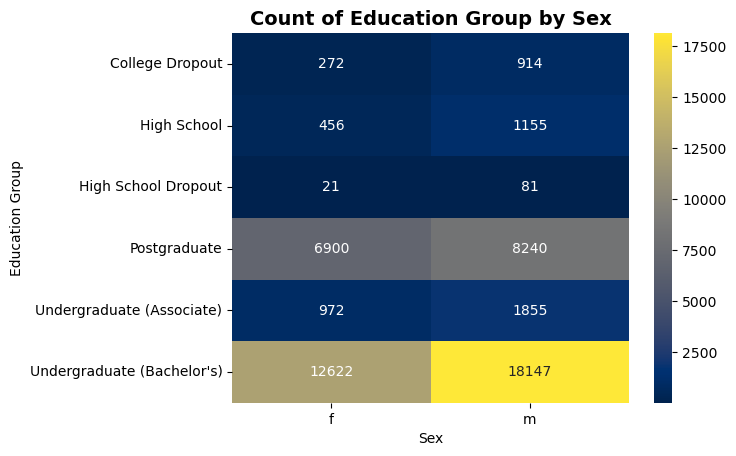

In [84]:

#Plotting it
sns.heatmap(cross_tab_ed_sex, annot=True, fmt='d', cmap='cividis')
plt.title("Count of Education Group by Sex", fontsize=14, fontweight='bold')
plt.xlabel("Sex")
plt.ylabel("Education Group")
plt.show()


In [85]:
#Age group distribution 
age = profile_df["age"].unique()
age = np.sort(age)
print (f"Minimum age : {age.min()}")
print (f"Maximum age : {age.max()}")


Minimum age : 17
Maximum age : 111


In [68]:

mask_m= profile_df["sex"] == "m"
mask_f = profile_df["sex"] == "f"
female_data = profile_df[mask_f]

male_data = profile_df[mask_m]
print(female_data.describe())
print(male_data.describe())


                age        height          income
count  24117.000000  24116.000000    24117.000000
mean      32.814446     65.103873    11181.697392
std       10.069733      2.926502    74149.778856
min       17.000000      4.000000       -1.000000
25%       26.000000     63.000000       -1.000000
50%       30.000000     65.000000       -1.000000
75%       38.000000     67.000000       -1.000000
max      111.000000     95.000000  1000000.000000
                age        height          income
count  35829.000000  35827.000000    35829.000000
mean      32.012950     70.443492    25991.307656
std        9.064867      3.076521   109845.249284
min       17.000000      1.000000       -1.000000
25%       26.000000     68.000000       -1.000000
50%       30.000000     70.000000       -1.000000
75%       36.000000     72.000000       -1.000000
max      109.000000     95.000000  1000000.000000


In [ ]:
#EDA for female and male data (Height, Age, Income)

/var/folders/dv/nxg3knns5hbg0mbh8p2pqwfw0000gn/T/ipykernel_17598/4065648785.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=profile_df, x="sex", y="age",inner="quartile",palette="muted")


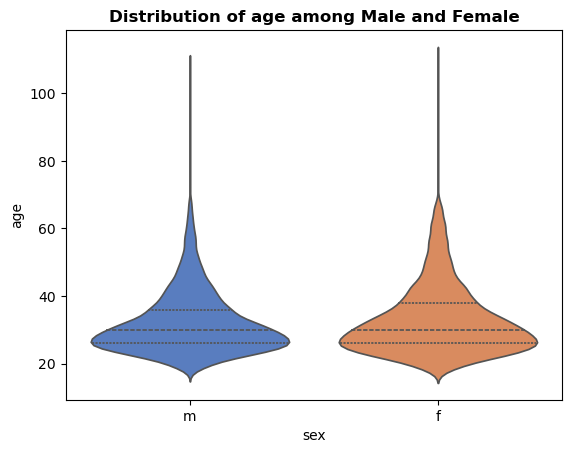

In [69]:
sns.violinplot(data=profile_df, x="sex", y="age",inner="quartile",palette="muted")
plt.title("Distribution of age among Male and Female",fontweight = "bold")
plt.show() 



Text(0.5, 1.0, 'Income distribution (Female User)')

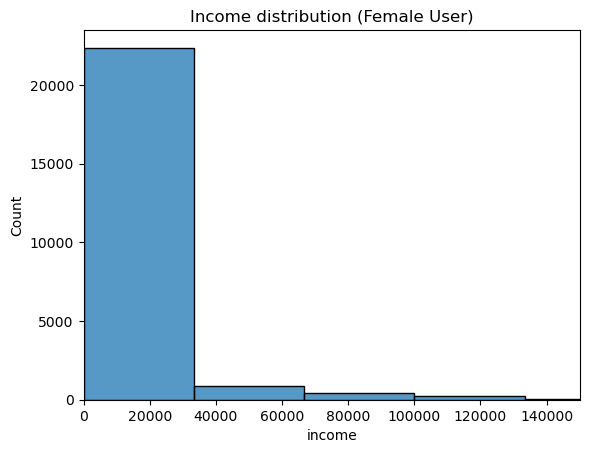

In [70]:
sns.histplot(data=female_data, x="income", bins=30, stat="count", kde=False)
plt.xscale("linear")
plt.xlim(0, 150000)
plt.title("Income distribution (Female User)")


Text(0.5, 1.0, 'Income distribution (Male User)')

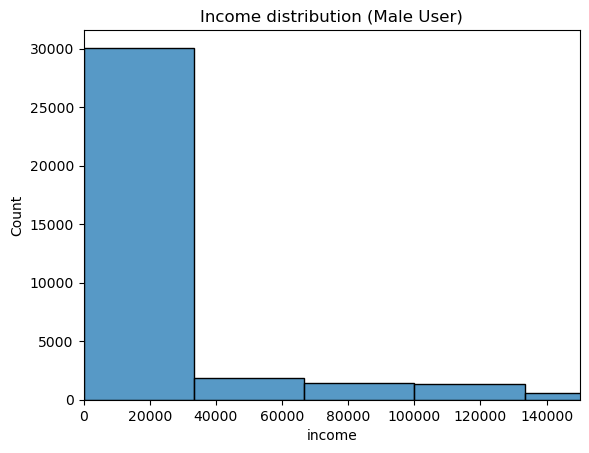

In [71]:
sns.histplot(data=male_data, x="income", bins=30, stat="count", kde=False)
plt.xscale("linear")
plt.xlim(0, 150000)
plt.title("Income distribution (Male User)")

From the two plots we can see that they come from same socioeconomic background. 


# Do people actually mean what they say? 
Analysis on inconsistencies in user profiles

In [ ]:
# Extracting the columns we need 
lifestyle = ['diet', 'drinks', 'smokes', 'drugs']
encoded_data = pd.get_dummies(profile_df[lifestyle], drop_first=False)
iso = IsolationForest(contamination=0.05, random_state=42)
encoded_data['coherence_score'] = iso.fit_predict(encoded_data)
incoherent = encoded_data[encoded_data['coherence_score'] == -1]
incoherent_idx = encoded_data[encoded_data['coherence_score'] == -1].index.dropna()
incoherent_profiles = profile_df.loc[incoherent_idx, lifestyle]
print(f" The lifestyle incoherency analysis found {len(incoherent_profiles)} incoherent profile(s)")
print(incoherent_profiles)


 The lifestyle incoherency analysis found 2992 incoherent profile(s)
                      diet       drinks          smokes      drugs
122               anything     socially  trying to quit  sometimes
123      strictly anything     socially       sometimes      often
131      mostly vegetarian     socially  trying to quit      never
146                    NaN  desperately             yes      often
179        mostly anything        often   when drinking  sometimes
...                    ...          ...             ...        ...
59864  strictly vegetarian  desperately   when drinking        NaN
59895  strictly vegetarian        often  trying to quit        NaN
59902         mostly other       rarely             yes      never
59918    mostly vegetarian     socially             yes  sometimes
59944      mostly anything     socially  trying to quit      often

[2992 rows x 4 columns]


# If everything is conventionally okay then why are they on dating app? (Too good to be true?)

ed_money = profile_df[["education_group", "income"]]
ed_money = ed_money[ed_money["income"] != -1]
ed_money = ed_money[ed_money["education_group"] != "Outside"]

In [93]:
ed_money = profile_df[["education_group", "income"]]
ed_money = ed_money[ed_money["income"] != -1]
ed_money = ed_money[ed_money["education_group"] != "Outside"]
bins = [0, 50000, 150000, float('inf')]
labels = ["Low", "Mid", "High"]
ed_money["income_group"] = pd.cut(ed_money["income"], bins=bins, labels=labels, right=False)
encoded_edmoney = pd.get_dummies(ed_money[["education_group", "income_group"]], drop_first=False)
iso = IsolationForest(contamination=0.05, random_state=42)
encoded_edmoney['coherence_score'] = iso.fit_predict(encoded_edmoney)
incoherent_idx = encoded_edmoney[encoded_edmoney['coherence_score'] == -1].index
incoherent_profiles = profile_df.loc[incoherent_idx, ["education_group", "income", "diet", "drinks", "smokes", "drugs"]]
print(f"{len(incoherent_profiles)} incoherent profile(s) found:")
print(incoherent_profiles)


539 incoherent profile(s) found:
           education_group   income             diet    drinks  \
137          Undergraduate    80000  mostly anything     often   
147          Undergraduate    80000              NaN  socially   
177    High School Dropout   250000     mostly halal     often   
301          Undergraduate  1000000         anything  socially   
335        College Dropout    70000  mostly anything  socially   
...                    ...      ...              ...       ...   
59062        Undergraduate    50000  mostly anything  socially   
59219        Undergraduate    80000         anything  socially   
59280        Undergraduate  1000000              NaN  socially   
59354      College Dropout    80000              NaN    rarely   
59485        Undergraduate    20000         anything     often   

               smokes      drugs  
137                no      never  
147                no      never  
177     when drinking      never  
301    trying to quit  sometimes  